# Statistics: The Science of Decisions Project Instructions

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

### Q1. What is our independent variable? What is our dependent variable?

The independent variable is the category of test being done - either congruent or incongruent.

The dependent variable is the elapsed time a participant takes to name the ink colors for the respective category.

### Q2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We'll call $\mu_C$ the population mean for the Congruent test, and $\mu_I$ the population mean of the Incongruent test. $\mu = \mu_I - \mu_C$ is the population mean of the difference. Our null and alternate hypotheses are:

$$ H_0: \mu = 0 $$
$$ H_\text{alt}: \mu > 0 $$

In plain terms, the null hypothesis is that the mean elapsed time per task is the same, so there is no difference between the Congruent and Incongruent tasks. The alternate hypothesis is that the mean Incongruent task is greater than the mean Congruent task. I have a chosen a directional difference since it's more psychologically demanding to focus on the ink colour and avoid reading the word, and hence a longer response time is likely.

The test will be a one-tailed t-test. We have a limited number of samples and do not know the population means or standard deviations, and the underlying population distributions are likely to be Gaussian. It's one side-sided due to the directional inequality in the alternative hypothesis. This will be a dependent (paired-samples) t-test, since we are observing a given sample that has been tested twice. 

### Q3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('stroopdata.csv')

As a measure of central tendency, we'll look at the mean response times for the two tests:

In [3]:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

And as a measure of variability, the standard deviations. The Pandas library assumes that these are from a sample, so the sum of squared deviations are divided by (n-1):

In [4]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

Just for good measure -- a little correlation:

In [5]:
df.corr()

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000


### Q4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

We'll start with a simple histogram of the two distributions:

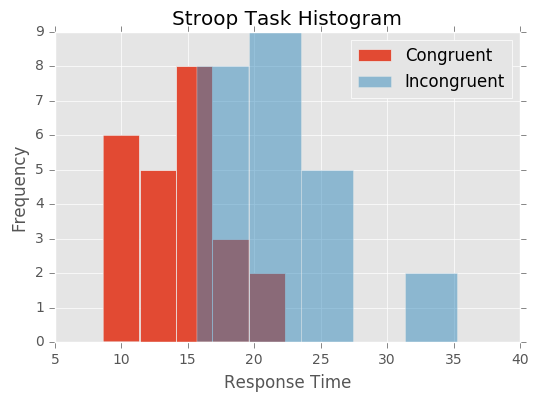

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
df['Congruent'].plot(kind='hist', alpha=1, bins=5, label='Congruent', legend=True, title="Stroop Task Histogram");
df['Incongruent'].plot(kind='hist', alpha=0.5, bins=5, label='Incongruent', legend=True);
plt.xlabel("Response Time");

The Congruent task appears to have a positively skewed distribution, while the Incongruent is unclear - I would infer that the population might be either positively skewed or normal. All of the central tendency measures of the Incongruent task are greater than that of the Congruent task.

We'll also look at the boxplot for the distributions:

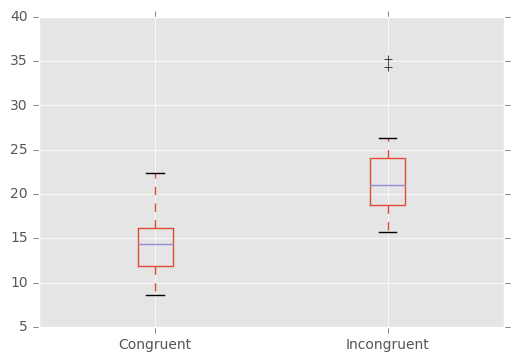

In [9]:
df.boxplot(return_type='axes');

The boxplot shows that the Incongruent distrbution is closer to normal, save for the presence of outliers. 

### Q5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Let's start by choosing CI at 95%, and $\alpha$ = 0.05.

In [19]:
df['diff'] = df['Incongruent'] - df['Congruent']
xbar = df['diff'].mean()
S = df['diff'].std()
SEM = S / np.sqrt(df['diff'].count())
t_stat = xbar / SEM
print('T-statistic is', t_stat)
print('dof is', df['diff'].count()-1)

T-statistic is 8.02070694411
dof is 23


Using the <a href='https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg'>table of t-values</a>, we see that the t-critical value for $\alpha=0.05$ and $\text{dof}=23$ is 1.714. The t-statistic exceeds this critical value, thus we reject the null hypothesis $H_0$, as expected! From this we conclude that, in terms of population means, $\mu_I > \mu_C$ - or in plain terms, on average it takes longer to perform the Incogruent test than it does the Congruent test.

### Q6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

My personal belief is that the task of reading words is more "neurologically available" than is the recognition and articulation of colours. This isn't quite the same as the brain processing one faster than the other - but rather when presented with both, the former task dominates the mental resources. 

Tasks similar to the original Stroop test involve some sort of classification of an attribute which is simultaneously presented alongside a secondary attribute that in some way represents a different instance of the primary attribute. In the Stroop test, the primary attribute is the ink color, and the secondary attribute is a word representation of a different color.

A variation therefore might be auditory: participants are subjected to a recording of the words "high" "medium" or "low" being spoken in 3 very distinct pitches, and asked to identify the pitch. 